In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

from keras import backend as K
from keras.callbacks import ModelCheckpoint
import h5py

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/linhtinh/best_model.hdf5')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
train_data_dir = '/content/drive/MyDrive/Public folder/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Public folder/Data/Test'

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Public folder/Data/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Public folder/Data/Train/Thu cung',
 '/content/drive/MyDrive/Public folder/Data/Train/Tai lieu',
 '/content/drive/MyDrive/Public folder/Data/Train/Toa nha',
 '/content/drive/MyDrive/Public folder/Data/Train/Selfie',
 '/content/drive/MyDrive/Public folder/Data/Train/Nguoi',
 '/content/drive/MyDrive/Public folder/Data/Train/Xe co',
 '/content/drive/MyDrive/Public folder/Data/Train/Song suoi ho',
 '/content/drive/MyDrive/Public folder/Data/Train/Giay',
 '/content/drive/MyDrive/Public folder/Data/Train/Hoa don',
 '/content/drive/MyDrive/Public folder/Data/Train/Hoa',
 '/content/drive/MyDrive/Public folder/Data/Train/Dien thoai',
 '/content/drive/MyDrive/Public folder/Data/Train/Chup man hinh',
 '/content/drive/MyDrive/Public folder/Data/Train/Bien',
 '/content/drive/MyDrive/Public folder/Data/Train/Bau troi',
 '/content/drive/MyDrive/Public folder/Data/Train/Bia sach',
 '/content/drive/MyDrive/Public folder/Data/Train/Dong ruong',
 '/content/drive/MyDrive/Public fo

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11598 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/linhtinh/best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=5)

In [ ]:
%%time
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpoint]
)

  4/363 [..............................] - ETA: 1:50:28 - loss: 0.1566 - accuracy: 0.9688
Epoch 00001: loss improved from inf to 0.12981, saving model to /content/drive/MyDrive/linhtinh/best_model.hdf5
  9/363 [..............................] - ETA: 1:43:03 - loss: 0.1573 - accuracy: 0.9653
Epoch 00001: loss did not improve from 0.12981
 14/363 [>.............................] - ETA: 1:39:10 - loss: 0.1563 - accuracy: 0.9554
Epoch 00001: loss did not improve from 0.12981
 19/363 [>.............................] - ETA: 1:36:34 - loss: 0.1418 - accuracy: 0.9589
Epoch 00001: loss did not improve from 0.12981
 24/363 [>.............................] - ETA: 1:35:53 - loss: 0.1450 - accuracy: 0.9570
Epoch 00001: loss did not improve from 0.12981
 29/363 [=>............................] - ETA: 1:33:58 - loss: 0.1331 - accuracy: 0.9580
Epoch 00001: loss did not improve from 0.12981
 34/363 [=>............................] - ETA: 1:32:23 - loss: 0.1277 - accuracy: 0.9568
Epoch 00001: loss did n

In [ ]:
model.save('/content/drive/MyDrive/linhtinh/my_model.h5')

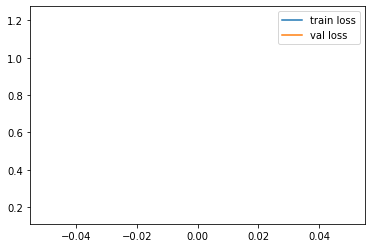

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


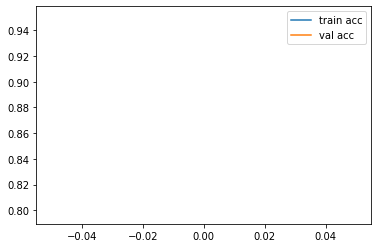

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model = load_model('/content/drive/MyDrive/linhtinh/my_model.h5')

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 5.0 MB/s 


In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/linhtinh')